In [491]:
%matplotlib inline

import os
import subprocess
import warnings
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown
from scipy import stats
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier, export_graphviz

STEP = 0.001
IX = np.arange(0, 1 + STEP, STEP)

# *Part 1*: Classifiers for Basketball Courts
***

In [493]:
XY = pd.DataFrame([ [0.75, 0.10, -1.0],
                    [0.85, 0.80, -1.0],
                    [0.85, 0.95, 1.0],
                    [0.15, 0.10, -1.0],
                    [0.05, 0.25, 1.0],
                    [0.05, 0.50, 1.0],
                    [0.85, 0.25, -1.0] ],
                    columns=['X1','X2','Y'])
X, Y = XY[['X1','X2']], XY['Y']
labels = [ ('+','g') if yi > 0 else ('_','r') for yi in Y ]
markers, colors = zip(*labels)

def plot_court(line, markers=markers, colors=colors, step=STEP, plot_shots=False):
    if line == '3-point':
        plt.plot(IX, np.sqrt(IX),'-', c='orange', alpha=0.7, lw=2)
    elif line == 'paint':
        plt.plot([0.5,0.5,1.0],[0,0.25,0.25],'-', c='orange', alpha=0.7, lw=2)
    if plot_shots:
        for _s, _c, _x1, _x2 in zip(markers, colors, X['X1'], X['X2']):
            plt.scatter(_x1, _x2, marker=_s, c=_c, s=50)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.axis([0,1,0,1])
    return plt

display(XY); print "Table 1. Observed Shots"

,X1,X2,Y
0,0.75,0.10,-1.0
1,0.85,0.80,-1.0
2,0.85,0.95,1.0
3,0.15,0.10,-1.0
4,0.05,0.25,1.0
5,0.05,0.50,1.0
6,0.85,0.25,-1.0


Table 1. Observed Shots


### 1(b).  Perceptron Algorithm

In [494]:
# Run the Perceptron
clf = Perceptron(random_state=2018, n_iter=20, verbose=True)
clf = clf.fit(X, Y)
Y_hat = clf.predict(X)

w0 = clf.intercept_[0]
w1, w2 = clf.coef_[0]

print "\n[ Weights ]"
print "w0 =",w0
print "w1 =",w1
print "w2 =",w2

print "\n[ Output ]"
print 'y_train =\t', Y.values
print 'y_predict =\t', Y_hat

-- Epoch 1
Norm: 0.95, NNZs: 2, Bias: -1.000000, T: 7, Avg. loss: 0.497500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.40, NNZs: 2, Bias: 0.000000, T: 14, Avg. loss: 0.434643
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.95, NNZs: 2, Bias: 1.000000, T: 21, Avg. loss: 0.370714
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.97, NNZs: 2, Bias: -1.000000, T: 28, Avg. loss: 0.337411
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.27, NNZs: 2, Bias: 1.000000, T: 35, Avg. loss: 0.304643
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.68, NNZs: 2, Bias: 0.000000, T: 42, Avg. loss: 0.319464
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.80, NNZs: 2, Bias: -1.000000, T: 49, Avg. loss: 0.281173
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 3.36, NNZs: 2, Bias: 0.000000, T: 56, Avg. loss: 0.270982
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 3.83, NNZs: 2, Bias: 1.000000, T: 63, Avg. loss: 0.255635
Total training time: 0.00 seconds.
-- Epoch

The perceptron converges around epoch 15, when T = 105. At this point, no mistakes are made and thus error is zero. Other solutions exist for similar values of $w$ and intercepts greater than 0. Specifically, for decision boundaries passing through the origin, values of $w_1, w_2$ satsifying $16/17 < w_1/w_2 < 19/17$ will produce classifiers with zero error.

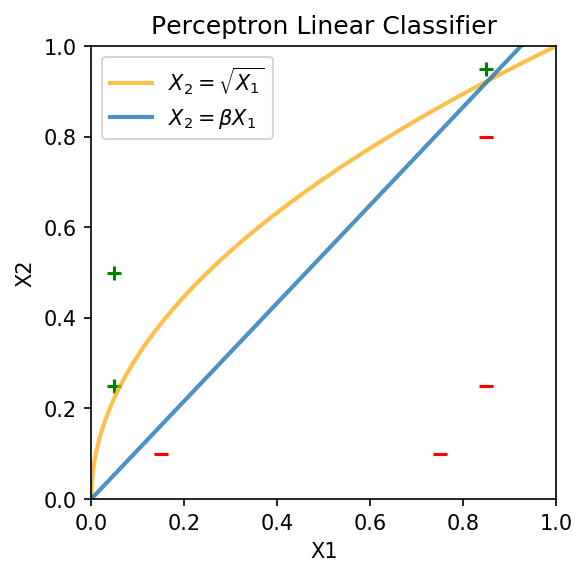

In [495]:
# Plot Perceptron Results
fig = plt.figure(figsize=(4,4), dpi=150)
plt = plot_court('3-point', plot_shots=True)
plt.plot(IX, -IX*(w0 + w1/w2), alpha=0.8, lw=2)
plt.legend((r'$X_2 = \sqrt{X_1}$',r'$X_2 = \beta X_1$',))
plt.title("Perceptron Linear Classifier")
plt.show()

The decision boundary produced by the perceptron is drawn in blue.

### 1(b) Decision Tree

In [496]:
# Run the Decision Tree
clf = DecisionTreeClassifier(random_state=2018)
clf = clf.fit(X, Y)
Y_hat = clf.predict(X)

print "\n[ Output ]"
print 'y_train =\t', Y.values 
print 'y_predict =\t', Y_hat

clf = DecisionTreeClassifier(random_state=2018, min_impurity_split=0.1)
clf = clf.fit(X, Y)
Y_hat = clf.predict(X)

print "\n[ Output ]"
print 'y_train =\t', Y.values
print 'y_predict =\t', Y_hat


[ Output ]
y_train =	[-1. -1.  1. -1.  1.  1. -1.]
y_predict =	[-1. -1.  1. -1.  1.  1. -1.]

[ Output ]
y_train =	[-1. -1.  1. -1.  1.  1. -1.]
y_predict =	[-1. -1.  1. -1.  1.  1. -1.]


Like the perceptron, a decision tree does not make any errors. By adjusting the threshold, equally accurate decision trees could be produced. This could be done by adjusting decision boundaries $0.1 \pm 0.05$ on the X1 axis and  $0.875 \pm 0.075$ along the X2 axis.

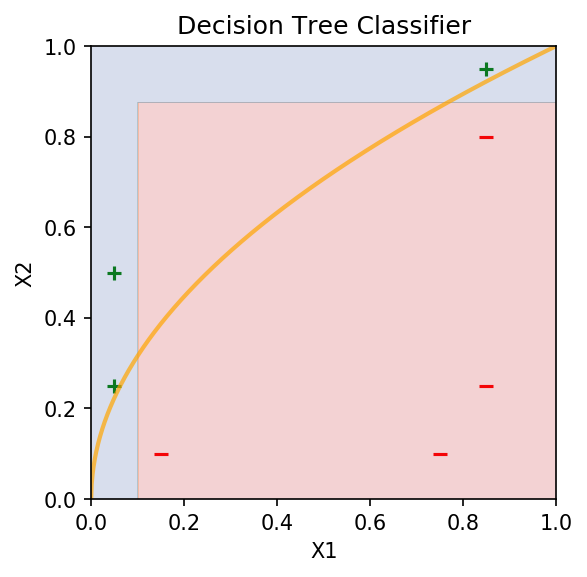

In [498]:
# Plot Decision Tree Results
fig = plt.figure(figsize=(4,4), dpi=150)
plt = plot_court('3-point', plot_shots=True)
xx, yy = np.meshgrid(IX, IX)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
plt.title("Decision Tree Classifier")
plt.show()


This figure shows the decision boundary of the decision tree. The region shown in blue defines predicted 3-point shots, whereas the region in red shows predicted 2-point shots. 

### 1(c).  Optimal Linear Classifier

The true risk is defined as
$$R^{train}(f) = {\bf E}_{(x,y) \sim D}L(f(x),y) = \int_{(x,y) \sim D}L(f(x),y)$$

We thus want to compute the area between $X_2=\sqrt X_1$ and $X_2=\beta X_1$ by integrating over $D = [0,1]\times[0,1]$. To solve for risk, we must break this integral into three parts along the $X_1$ axis, at each intersection.

In [490]:
b = 1.2
fig = plt.figure(figsize=(4,4), dpi=150)
plt = plot_court('3-point')
plt.plot(IX, b*IX, alpha=0.8, lw=1)
plt.fill_between(IX, np.sqrt(IX), b*IX, facecolor='gray', alpha=0.3)
plt.legend((r'$X_2 = \sqrt{X_1}$',r'$X_2 = \beta X_1$',))
plt.plot([1/b**2,1/b**2],[0.3,1],'k--',alpha=0.2,lw=1)
plt.plot([1/b,1/b],[0.4,1],'k--',alpha=0.2,lw=1)
plt.annotate(r'$\frac {1}{\beta^2}$', [1/b**2, 0.2], horizontalalignment='center', fontsize=16)
plt.annotate(r'$\frac {1}{\beta}$', [1/b, 0.3], horizontalalignment='center', fontsize=16)
plt.show()

NameError: name 'plot_court' is not defined

The area is thus given as follows:

$$ R_{Perceptron}(f) = 
\int_{0}^{1/\beta^2} \left( \sqrt x_1 - \beta x_1 \right) dx_1 + 
\int_{1/\beta^2}^{1/\beta} \left( \beta x_1 - \sqrt x_1 \right) dx_1 +
\int_{1/\beta}^{1} \left( 1 - \beta x_1 \right) dx_1
$$

We are interested in the value of $\beta$ that minimizes $ R^{train}(f) $. This occurs at

$$ \frac{d}{d\beta} R^{train}(f) = 0 $$

Solving, we find that the risk is minimized when

$$\beta = \sqrt{2}$$

The optimal linear classification boundary is shown below.

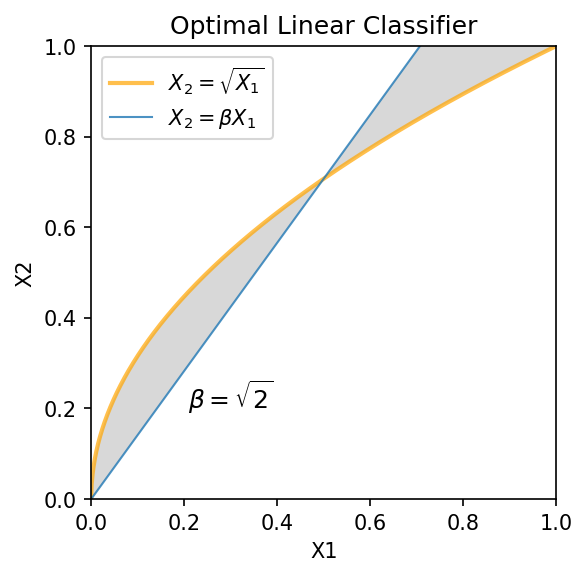

In [74]:
b = np.sqrt(2)
fig = plt.figure(figsize=(4,4), dpi=150)

plt = plot_court('3-point')
plt.plot(IX, b*IX, alpha=0.8, lw=1)
plt.fill_between(IX, np.sqrt(IX), b*IX, facecolor='gray', alpha=0.3)
plt.legend((r'$X_2 = \sqrt{X_1}$',r'$X_2 = \beta X_1$',))
plt.title("Optimal Linear Classifier")
plt.annotate(r'$\beta=\sqrt{2}$', [0.3, 0.2], ha='center', fontsize=12)
plt.show()

Because the slope of $\beta = \sqrt{2}$ falls outside the threshold defined in (a), the optimal classifier is not among the solutions that minimze the empirical loss. This suggests that a a dataset must sufficiently sample the true distribution of $D$ in order to produce an effective classifier.

### 1(d).  Optimal Depth 2 Decision Tree

There are two cases to consider when solving the optimal depth 2 decision tree. The algorithm may make the first split on either axis, and thus there exist two possible structures for the optimal tree:

1. $X_1 \leq s_1$; followed by two splits of the form $X_2 \leq s_2$ and $X_2 \leq s_3$
2. $X_2 \leq s_1$; followed by two splits of the form $X_1 \leq s_2$ and $X_1 \leq s_3$
.

These two cases are visualized below.

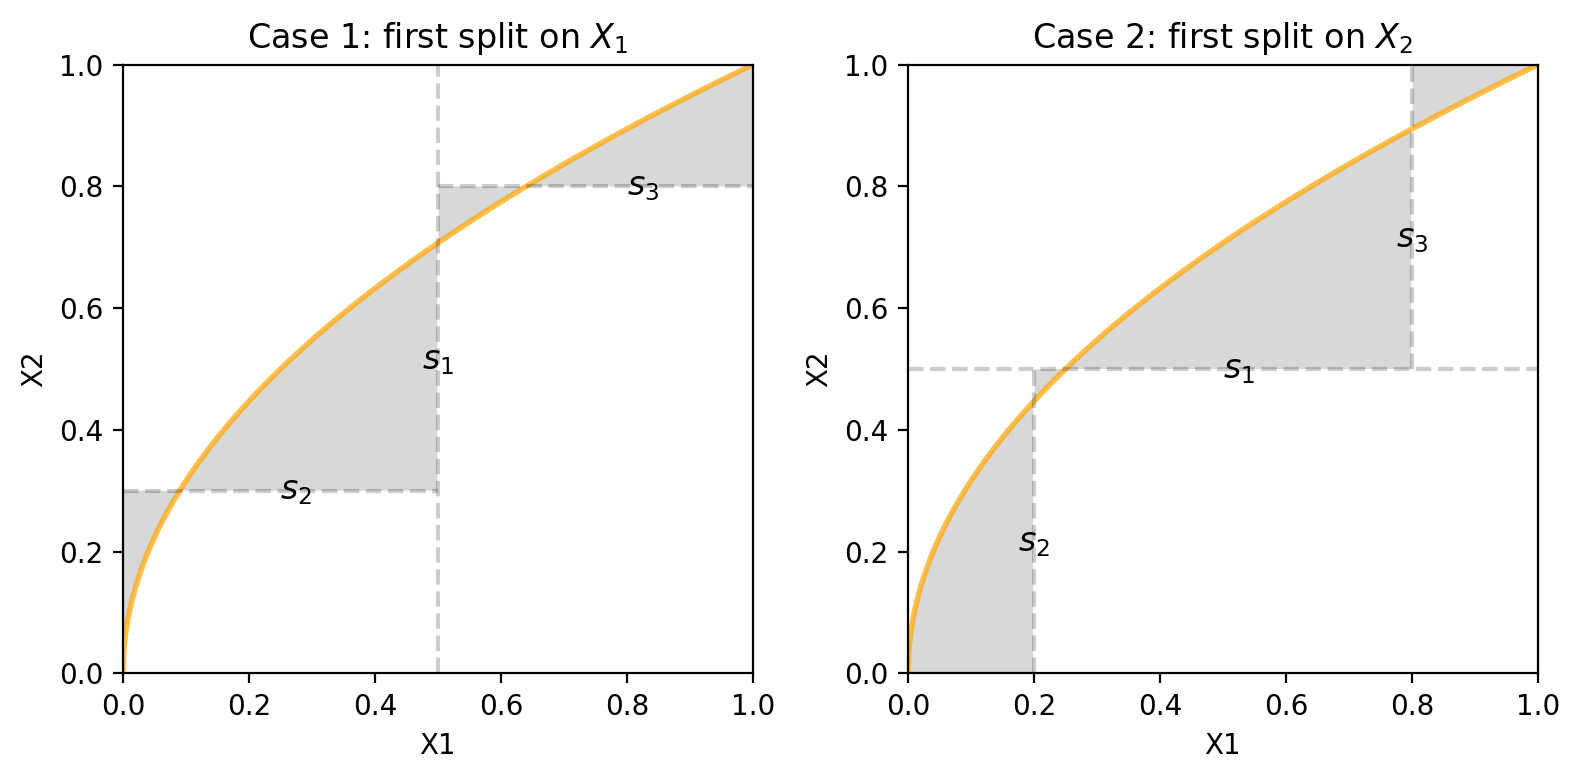

In [72]:
fig = plt.figure(figsize=(8,4), dpi=200)

s1, s2, s3 = 0.5, 0.3, 0.8

plt.subplot(1, 2, 1)
plt = plot_court('3-point')
plt.title("Case 1: first split on $X_1$")
plt.plot([s1,s1],[0,1],'k--',alpha=0.2); plt.annotate(r'$s_1$', [0.5,0.5], ha='center', fontsize=12)
plt.plot([0,s1],[s2,s2],'k--',alpha=0.2); plt.annotate(r'$s_2$', [0.25,s2], va='center', fontsize=12)
plt.plot([s1,1],[s3,s3],'k--',alpha=0.2); plt.annotate(r'$s_3$', [0.8,s3], va='center', fontsize=12)
plt.fill_between(IX[IX < s1], np.sqrt(IX[IX < s1]), s2, facecolor='gray', alpha=0.3)
plt.fill_between(IX[IX > s1], np.sqrt(IX[IX > s1]), s3, facecolor='gray', alpha=0.3)

s1, s2, s3 = 0.5, 0.2, 0.8

plt.subplot(1, 2, 2)
plt = plot_court('3-point')
plt.title("Case 2: first split on $X_2$")
plt.plot([0,1],[s1,s1],'k--',alpha=0.2); plt.annotate(r'$s_1$', [s1,s1], va='center', fontsize=12)
plt.plot([s2,s2],[0,s1],'k--',alpha=0.2); plt.annotate(r'$s_2$', [s2,0.2], ha='center', fontsize=12)
plt.plot([s3,s3],[s1,1],'k--',alpha=0.2); plt.annotate(r'$s_3$', [s3,0.7], ha='center', fontsize=12)
plt.fill_between(IX[IX < s2], np.sqrt(IX[IX < s2]), 0, facecolor='gray', alpha=0.3)
plt.fill_between(IX[(IX > s2) & (IX < s3)], np.sqrt(IX[(IX > s2) & (IX < s3)]), s1, facecolor='gray', alpha=0.3)
plt.fill_between(IX[IX > s3], np.sqrt(IX[IX > s3]), 1, facecolor='gray', alpha=0.3)

plt.tight_layout()
plt.show()

To identify the tree structure which minimizes risk, we must solve each case for the optimal values of $s_1$, $s_2$, and $s_3$ and compare the results. Although each of these splits may, in theory, classify regions of $D$ in either positively or negatively, we can make a simplifying assumption that the upper region is classified as positive for horizontal splits, and that the leftmost region is classified as positive for horizontal splits.

**Case 1:** Split on $X_1

The intersections between the 3-point line and $s_1$, $s_2$, and $s_3$ occur at $X_1 = s_1$, $X_1 = s_2^2$, and $s_3^2$, respectively. Then, the area between the decision tree boundary and the 3-point line is given by

$$ R_{T_1}(f) =
\int_{0}^{s_2^2} \left( s_2 - \sqrt{x_1} \right)dx_1 + 
\int_{s_2^2}^{s_1} \left(\sqrt{x_1} - s_2 \right)dx_1 + 
\int_{s_1}^{s_3^2} \left( s_3 - \sqrt{x_1} \right)dx_1 + 
\int_{s_3^2}^{1} \left( 1 - \sqrt{x_1} \right)dx_1
$$

To identify the thresholds that minimize risk, we evaluate the partial derivatives of $R^{T_1}(f)$ with respect to $s_1$, $s_2$, and $s_3$ and set to zero. Solving the resultant system of equations, we get

$$
s_1 = \frac{1}{8} \left( 2 + \sqrt{2} \right), \hspace{10mm}
s_2 = \frac{1}{28} \sqrt{10 + \sqrt{2}}\left( 2 + 2\sqrt{2} \right), \hspace{10mm}
s_3 = \frac{\sqrt{10 + \sqrt{2}}}{4}
$$

Evaluating $R_{T_1}(f)$ with these values for $s_1$, $s_2$, and $s_3$ yields:

$$ R_{T_1}(f) = 0.103585 $$


**Case 2:** Split on $X_2$

The intersections between the 3-point line and $s_1$, $s_2$, and $s_3$ occur at $X_1 = s_1$, $X_1 = \sqrt{s_2}$, and $X_2 = \sqrt{s_3}$, respectively. 

$$ R_{T2}(f) =
\int_{0}^{s_2} \left( \sqrt{x_1} \right)dx_1 + 
\int_{s_2}^{s_1^2} \left( s_1 - \sqrt{x_1} \right)dx_1 + 
\int_{s_1^2}^{s_3} \left( \sqrt{x_1} - s_1 \right)dx_1 + 
\int_{s_3}^{1} \left( x_1^2 - s_3 \right)dx_2
$$

To identify the thresholds that minimize risk, we evaluate the partial derivatives of $R_{T_2}(f)$ with respect to $s_1$, $s_2$, and $s_3$ and set to zero. Solving the resultant system of equations, we get

$$
s_1 = \frac{1}{6} \left( 2 + \sqrt{7} \right), \hspace{10mm}
s_2 = \frac{1}{72} \left( 4 + \sqrt{7} \right), \hspace{10mm}
s_3 = \frac{7}{72} \left( 4 + \sqrt{7} \right)
$$

Evaluating $R_{T_2}(f)$ with these values for $s_1$, $s_2$, and $s_3$ yields:

$$ R_{T_2}(f) = 0.117962 $$

We can thus conclude that Case 1 produces the optimal depth 2 decision tree.

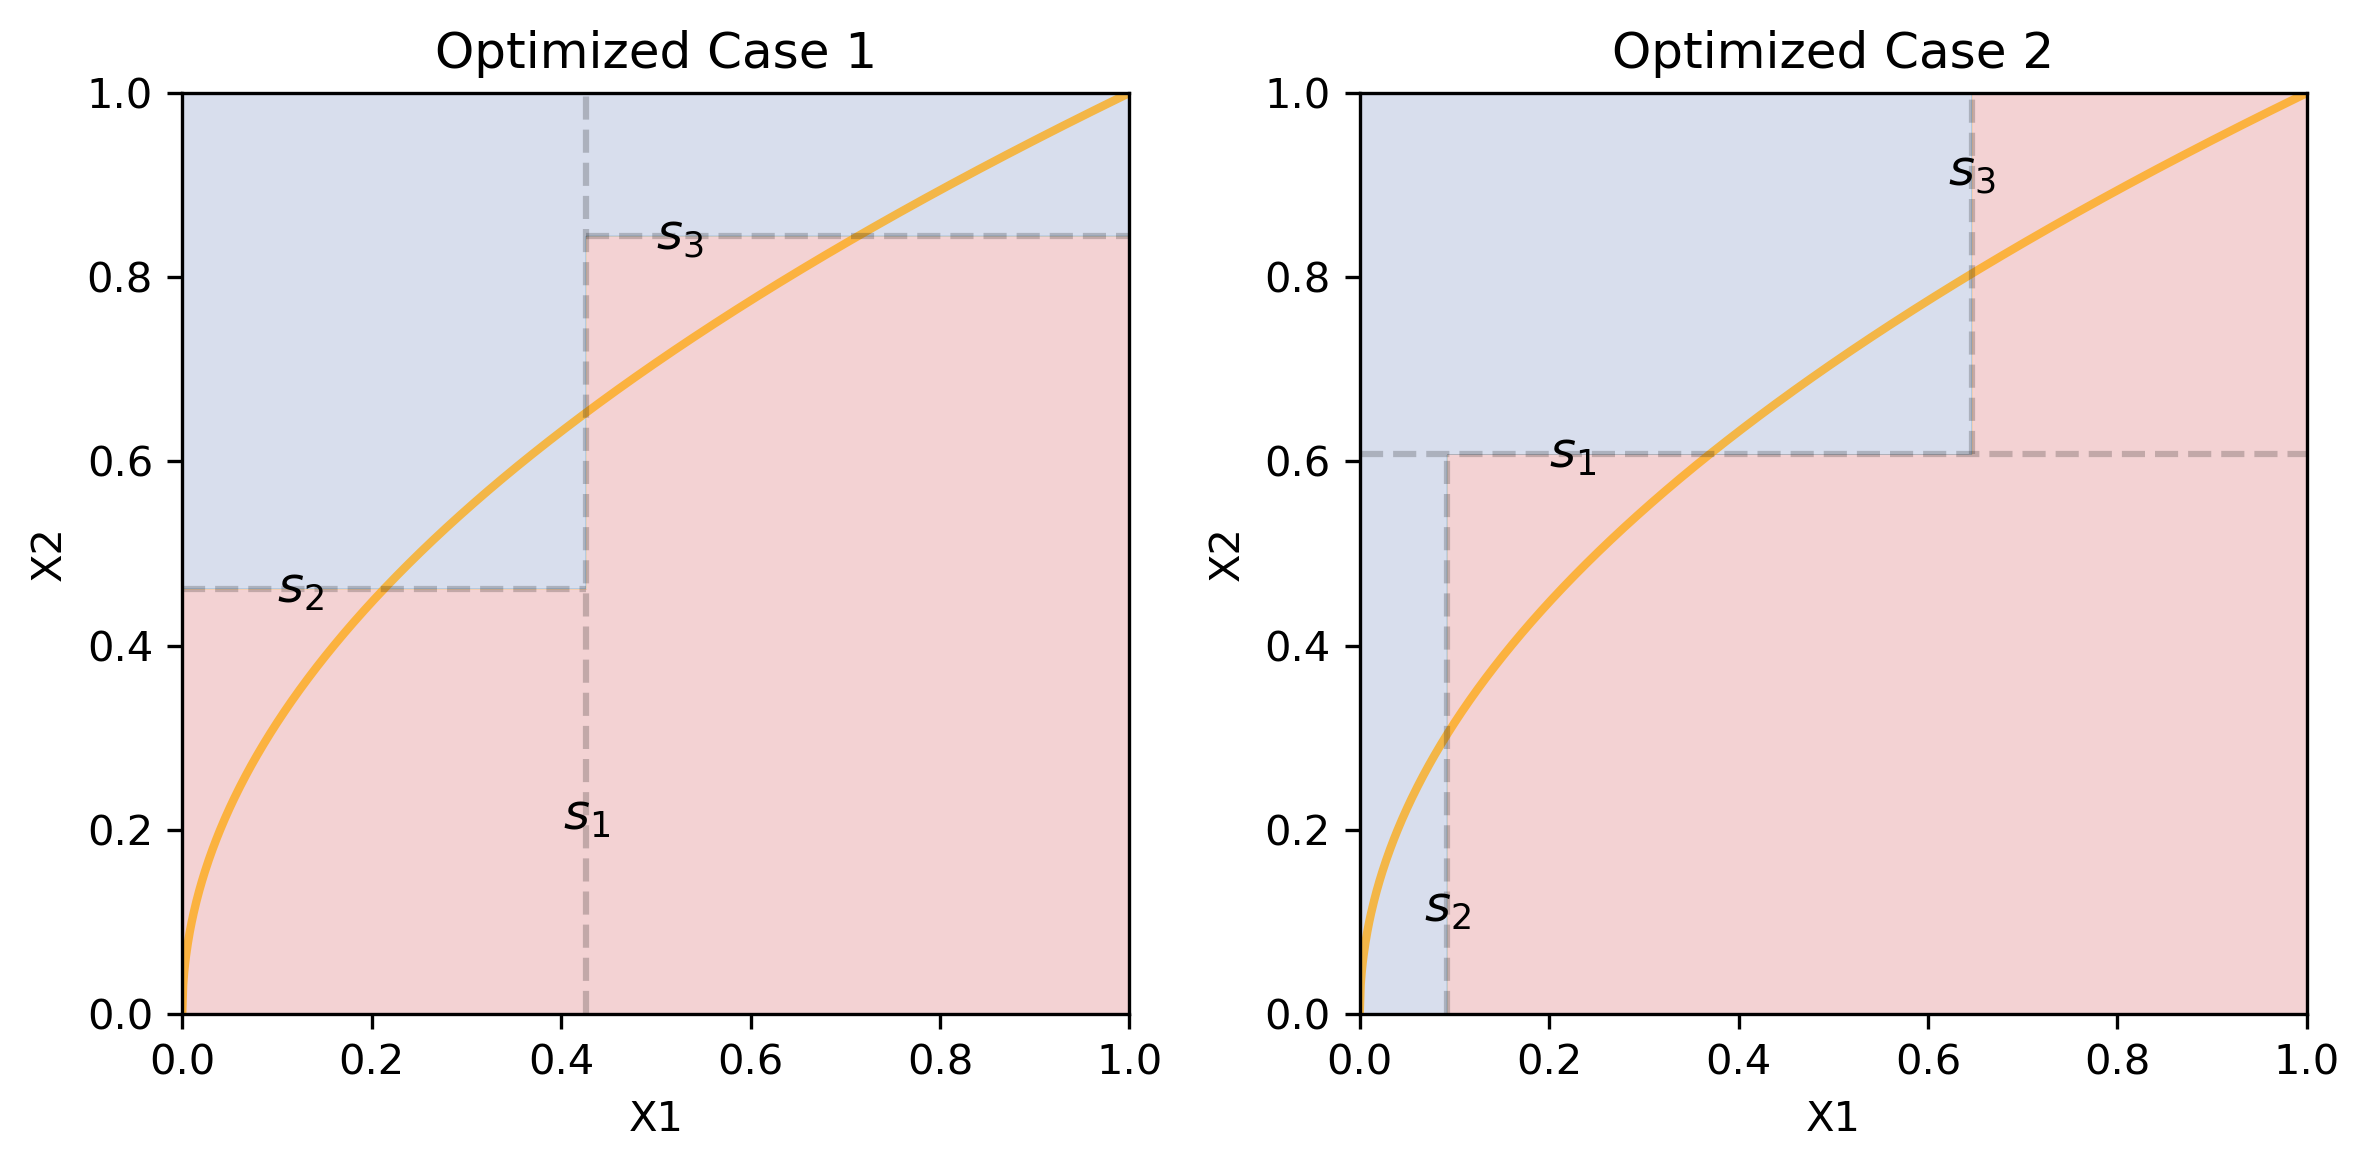

In [75]:
fig = plt.figure(figsize=(8,4), dpi=300)

s1 = (1.0/8)*(2+np.sqrt(2))
s2 = (1.0/28)*np.sqrt((10+np.sqrt(2)))*(1+2*np.sqrt(2))
s3 = np.sqrt((10+np.sqrt(2)))/4

plt.subplot(1, 2, 1)
plt = plot_court('3-point')
plt.title("Optimized Case 1")
plt.plot([s1,s1],[0,1],'k--',alpha=0.2); plt.annotate(r'$s_1$',[s1,0.2],ha='center',fontsize=12)
plt.plot([0,s1],[s2,s2],'k--',alpha=0.2); plt.annotate(r'$s_2$',[0.1,s2],va='center',fontsize=12)
plt.plot([s1,1],[s3,s3],'k--',alpha=0.2); plt.annotate(r'$s_3$',[0.5,s3],va='center',fontsize=12)

xx, yy = np.meshgrid(IX, IX)
XY = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([ 1.0 if (xy[0]<s1 and xy[1]>s2) or (xy[0]>s1 and xy[1]>s3) else -1.0 for xy in XY])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)

s1 = (1.0/6)*(1+np.sqrt(7))
s2 = (1.0/72)*(4 + np.sqrt(7))
s3 = (7.0/72)*(4 + np.sqrt(7))

plt.subplot(1, 2, 2)

plt = plot_court('3-point')
plt.title("Optimized Case 2")
plt.plot([0,1],[s1,s1],'k--',alpha=0.2); plt.annotate(r'$s_1$',[0.2,s1],va='center',fontsize=12)
plt.plot([s2,s2],[0,s1],'k--',alpha=0.2); plt.annotate(r'$s_2$',[s2,0.1],ha='center',fontsize=12)
plt.plot([s3,s3],[s1,1],'k--',alpha=0.2); plt.annotate(r'$s_3$',[s3,0.9],ha='center',fontsize=12)

xx, yy = np.meshgrid(IX, IX)
XY = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([ 1.0 if (xy[1]<s1 and xy[0]<s2) or (xy[1]>s1 and xy[0]<s3) else -1.0 for xy in XY])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)

plt.tight_layout()
plt.show()

### 1(e). Transformation of X1/X2

Consider the transformation $X_1 \Rightarrow X_1^2$. Then, $X_2 = \sqrt{X_1^2} \Rightarrow X_2 = X_1$. Then, the risk function becomes:


$$ R_{X_1^2}(f) = 
\int_{0}^{1/\beta^2} \left( x_1 - \beta x_1 \right) dx_1 + 
\int_{1/\beta^2}^{1/\beta} \left( \beta x_1 - x_1 \right) dx_1 +
\int_{1/\beta}^{1} \left( 1 - x_1 \right) dx_1
$$

This integral is minimized when $\beta = 1$. The risk for the $X_1$ transformation and this value of $\beta$ is exactly zero, since there now exists a linear decision boundary that is equivalent to the transformed 3-point line.

### 1(f). Decision Tree Classifier for Transformation

Since the decision boundary now lies along the diagonal $X_2 = X_1$, no decision tree classifier can achieve the same feature of zero error. This is due to the fact that decision tree classifiers cannot draw diagonal classification boundaries, only univariate boundaries along the axis of each variable. The only zero-error classification boundary lies exactly along the (transformed) 3-point line.

### 1(h). Optimal Linear Classifier for the Paint

The "paint" region $P$ is defined by $X_1 \in [0.5,1.0]$ and $X_2 \in [0.0,0.25]$. A linear classifier passing through this region has risk defined as follows:

$$ R_P(f) =
\int_{0}^{\frac{1}{2}} \left( \beta x_1 \right)dx_1 + 
\int_{\frac{1}{2}}^{\frac{1}{4\beta}} \left( 0.25 - \beta x_1 \right)dx_1 + 
\int_{\frac{1}{4\beta}}^{1} \left( \beta x_1 - 0.25 \right)dx_1
$$

We want the value of $\beta$ for which $ R_P(f) $ is lowest, so we take the derivative with respect to $\beta$ and set it to zero:

$$ \frac{d}{d\beta} R_P(f) = 0 $$

Solving, we get 

$$ \beta = \frac{1}{2\sqrt{3}} $$


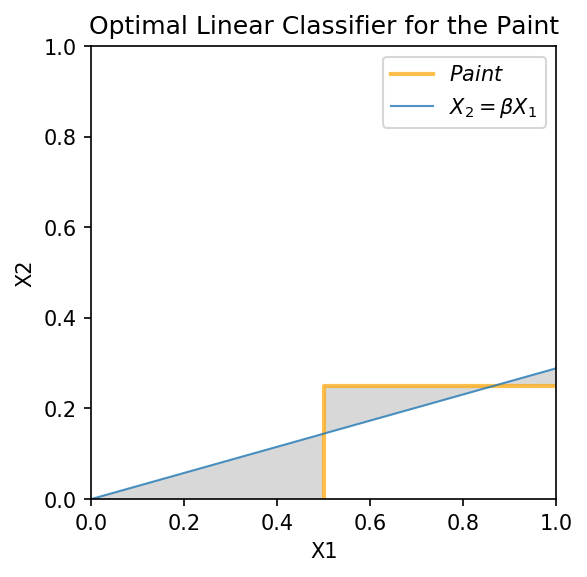

In [73]:
b = 1/(2*np.sqrt(3))

fig = plt.figure(figsize=(4,4), dpi=150)
plt = plot_court('paint')
plt.plot(IX, b*IX, alpha=0.8, lw=1)
plt.legend((r'$P$',r'$X_2 = \beta X_1$',))
plt.fill_between(IX[IX<0.5], 0.0, b*IX[IX<0.5], facecolor='gray', alpha=0.3)
plt.fill_between(IX[IX>0.5], 0.25, b*IX[IX>0.5], facecolor='gray', alpha=0.3)
plt.title("Optimal Linear Classifier for the Paint")
plt.show()

### 1(h). Optimal Depth 2 Decision Tree for the Paint

A depth 2 decision tree can classify this region with zero error. The optimal decision tree is defined by the simple rule:

$$ X_1 \leq 0.5 $$
$$ \swarrow \hspace{12mm} \searrow $$
$$ TRUE \hspace{12mm} FALSE $$
$$ \hspace{5mm} [+1] \hspace{12mm} X_2 \leq 0.25 $$
$$ \hspace{24mm} \swarrow \hspace{12mm} \searrow  $$
$$ \hspace{24mm} TRUE \hspace{10mm} FALSE $$
$$ \hspace{24mm} [+1] \hspace{12mm} [-1] $$

# *Part 2*: Variable Importance for Trees & Random Forests
***

## Part 2(a). Best Split and Best Surrogate Split

In [476]:
train = pd.read_table('train.csv', sep=',', dtype=np.float)
test = pd.read_table('test.csv', sep=',', dtype=np.float)

X, y = train[['X1','X2','X3','X4','X5']], train['Y']
X_test, y_test = test[['X1','X2','X3','X4','X5']], test['Y']

def visualize_tree(tree, feature_names, fname):
    dotfile = fname + '_tree.dot'
    imgfile = fname + '_tree.png'
    with open(dotfile, 'w') as f:
        export_graphviz(tree, out_file=f,feature_names=feature_names)
    command = ["dot", "-Tpng", "-Gdpi=300", dotfile, "-o", imgfile]
    subprocess.check_call(command)
    subprocess.check_call(["rm",dotfile])
    return imgfile

def get_gini(p):
    return 2*p*(1-p)

def get_similarity(X, y, feat1, feat2):
    n = float(len(y))
    x, x_tilde = X[feat1], X[feat2]
    xLeft, xRight = x[ x <= 0.5 ], x[ x > 0.5 ]
    yLeft, yRight = y[ x <= 0.5 ], y[ x > 0.5 ]   
    minLR = min(sum(yLeft)/n, sum(yRight)/n)
    P_LL = len(y[ (x <= 0.5) & (x_tilde <= 0.5) ])/n
    P_RR = len(y[ (x > 0.5) & (x_tilde > 0.5) ])/n
    return (minLR - (1.0 - P_LL - P_RR))/minLR

def find_best_feature(X, y):
    n = float(len(y))
    giniRoot = gini(sum(y)/n)
    importance = {}
    for feature in X.columns:
        importance[feature] = get_gini_importance(X, y, feature)
    best_feature = max(importance, key=importance.get)
    return best_feature

def find_best_surrogate(X, y, feature):
    n = float(len(y))
    similarity = {}
    for candidate in X.columns:
        if candidate == feature: continue
        similarity[candidate] = get_similarity(X, y, feature, candidate)
    best_surrogate = max(similarity, key=similarity.get)
    return best_surrogate

def get_gini_importance(X, y, feature, method='standard'):
    n = float(len(y))
    x = X[feature]
    xLeft, xRight = x[ x <= 0.5 ], x[ x > 0.5 ]
    yLeft, yRight = y[ x <= 0.5 ], y[ x > 0.5 ]
    giniRoot = get_gini(sum(y)/n)
    giniLeft = get_gini(sum(yLeft)/len(yLeft))
    giniRight = get_gini(sum(yRight)/len(yRight))
    giniVar = (len(yLeft)/n)*giniLeft + (len(yRight)/n)*giniRight
    giniDelta = abs(giniRoot - giniVar)
    
    if method == 'standard':
        return giniDelta
    elif method == 'surrogate':
        surrogate = find_best_surrogate(X,y,feature)
        giniDelta_surrogate = get_gini_importance(X,y,surrogate)
        return giniDelta + giniDelta_surrogate
    

### (i). Decision Stump for Split & Surrogate Split

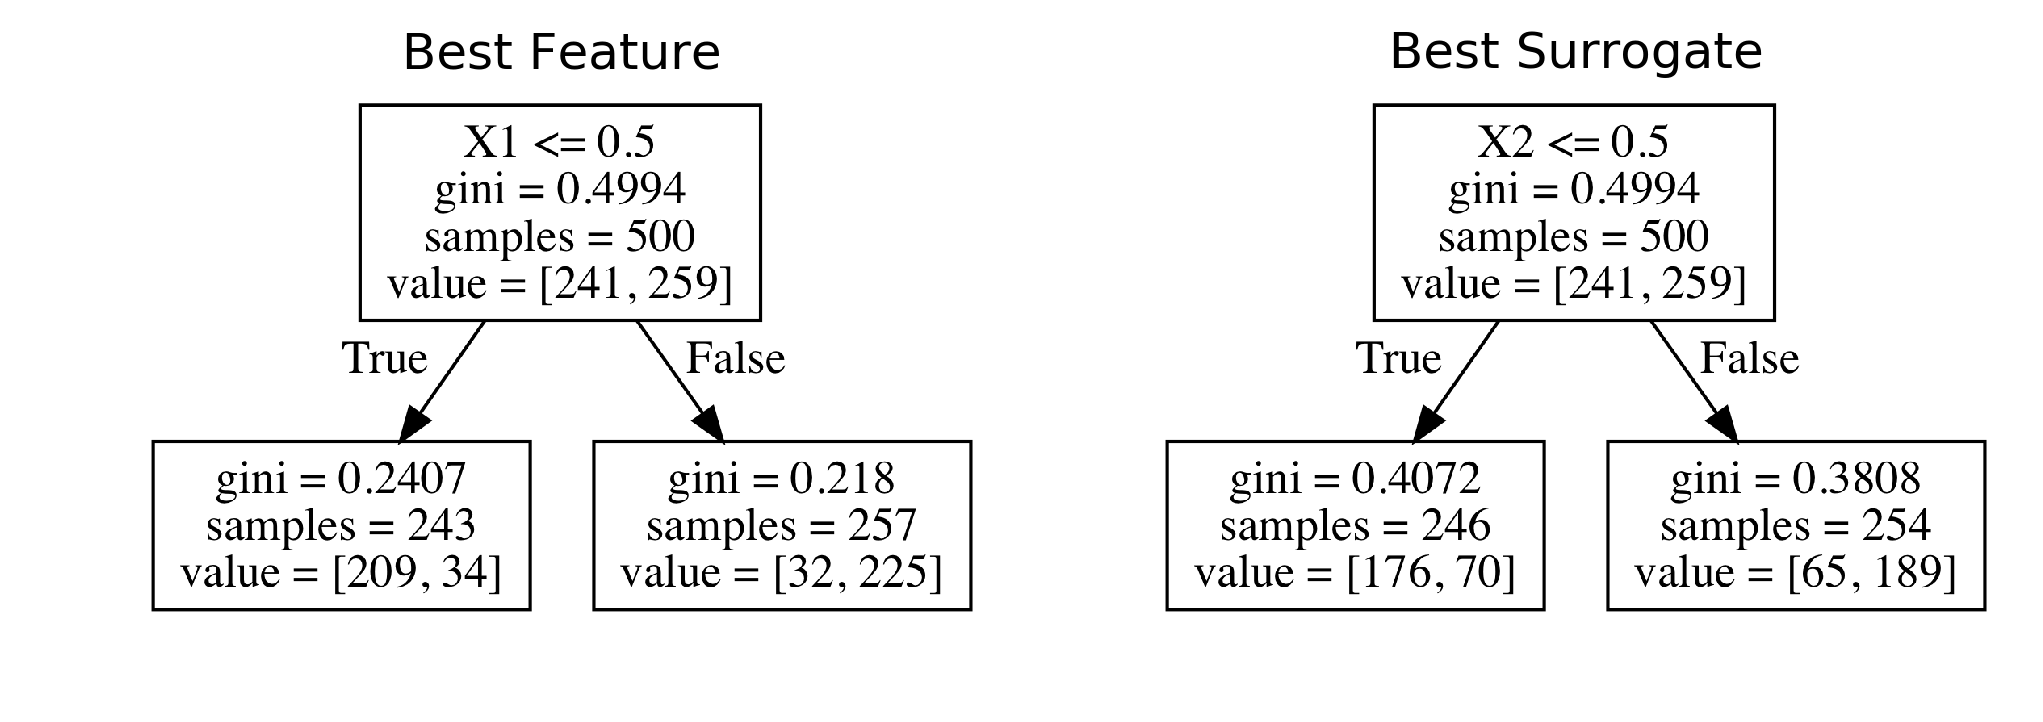

In [477]:
best_feature = find_best_feature(X, y)
best_surrogate = find_best_surrogate(X, y, best_feature)

fig = plt.figure(figsize=(8,4), dpi=300)

CLF = {}
for i, feature in enumerate([best_feature, best_surrogate]):
    x = X[feature]
    clf = DecisionTreeClassifier(max_depth=1)
    clf = clf.fit(np.matrix(x).T, y)
    CLF[feature] = clf
    imgfile = visualize_tree(clf, [feature], feature)
    img = mpimg.imread(imgfile)
    plt.subplot(1, 2, i+1)
    plt.imshow(img); plt.axis('off')
    plt.title("Best Feature" if i==0 else "Best Surrogate")

### (ii). Variable Importance for Best Split

In [478]:
imp2 = get_gini_importance(X, y, best_feature, method='standard')
imp3 = get_gini_importance(X, y, best_feature, method='surrogate')
ft = best_feature.replace('X','X_')

Markdown(r"$$ {Imp}^T(%s) = %f \\ {Imp}_s^T(%s) = %f $$" %(ft,imp2,ft,imp3))

$$ {Imp}^T(X_1) = 0.270319 \\ {Imp}_s^T(X_1) = 0.375881 $$

All other features have zero importance because they are not included in the tree. Equation (3) produces a slighly higher measure of importance than equation (2).

### (iii). Mean Least-Squares Error

In [479]:
def MLS_clf(X, y, feature):
    n = len(y)
    x = X[feature]   
    clf = CLF[feature]
    yhat = clf.predict(np.matrix(x).T)
    return (1.0/n)*sum((yhat - y )**2)

err_best = MLS_clf(X_test, y_test, best_feature)
err_surr = MLS_clf(X_test, y_test, best_surrogate)
    
Markdown(r"$$ MLE = %f \\ {MLE}_s = %f $$" %(err_best, err_surr))

$$ MLE = 0.100000 \\ {MLE}_s = 0.270000 $$

## Part 2(b). Random Forest Feature Size

In [480]:
def random_forest(X, y, K=5, M=1000, B=400):
    
    # Use these to record data about the forest
    results = {}
    gini_scores = dict(zip(X.columns,[[] for i in range(5)]))
    oob_scores = dict(zip(X.columns,[[] for i in range(5)]))
    losses = []
    predictions = []
    
    for metric in ['best_splits','best_surrogate_splits',
                   'gini_means','oob_means','gini_stds','oob_stds']:
        results[metric] = pd.Series(len(X.columns)*[0.0], index=X.columns)
    
    # Create M trees 
    for m in np.arange(0,M,1):
        # Randomly select K features and B samples
        use_samples = X.index[random.sample(range(n),B)]
        use_feats = X.columns[random.sample(range(5),K)]
        X_ = X.loc[use_samples, use_feats]
        y_ = y.loc[use_samples]

        best_feature = find_best_feature(X_, y_)
        results['best_splits'][best_feature] += 1.0
        gini_scores[best_feature].append(get_gini_importance(X_, y_, best_feature))

        # Compute OOB
        x_ = np.matrix(X_[best_feature]).T
        clf = DecisionTreeClassifier(max_depth=1).fit(x_, y_)
        yhat = clf.predict(x_)
        yhat_perm = clf.predict(np.random.permutation(x_))
        err_train = sum( (y_ - yhat)**2 )
        err_perm = sum( (y_ - yhat_perm)**2 )
        oob_scores[best_feature].append(err_perm - err_train)
        
        # Predict on test data
        x_test = np.matrix(X_test[best_feature]).T
        yhat_test = clf.predict(x_test)
        err_test = sum( (y_test - yhat_test)**2 )
                
        # Record loss and predictions for each loop
        predictions.append( yhat_test )
        losses.append( err_test )
                
        if k != 1:
            best_surrogate = find_best_surrogate(X_, y_, best_feature)
            results['best_surrogate_splits'][best_surrogate] += 1

    # Get mean and standard deviations of feature importances
    for feature in X.columns:
        results['gini_means'][feature] = sum(gini_scores[feature])/M
        results['oob_means'][feature] = sum(oob_scores[feature])/M
        results['gini_stds'][feature] = np.std(gini_scores[feature])
        results['oob_stds'][feature] =  np.std(oob_scores[feature])
    
    results['predictions'] = stats.mode(predictions, axis=0).mode.T[0]
    results['losses'] = losses
    
    return results

In [481]:
M = 1000

best_features = []
best_surrogates = []
importances_gini = []
importances_oob = []

for k in np.arange(1,6,1):
    results = random_forest(X, y, K=k, B=int(q*n), M=M)
    
    best_features.append( results['best_splits'].rename("K="+str(k),inplace=True))
    best_surrogates.append( results['best_surrogate_splits'].rename("K="+str(k),inplace=True))
    importances_gini.append( results['gini_means'].rename("K="+str(k),inplace=True))
    importances_oob.append( results['oob_means'].rename("K="+str(k),inplace=True))

# Aggregate results into one table
df_best = pd.concat(best_features,axis=1).T
df_surr = pd.concat(best_surrogates,axis=1).T
df_gini = pd.concat(importances_gini,axis=1).T.fillna(0.0)
df_oob = pd.concat(importances_oob,axis=1).T.fillna(0.0)

# Get error
test_error_avg = np.mean(results['losses'])
test_error_vote = sum((y_test - results['predictions'])**2)

### (i). Best Split and Best Surrogate Splits

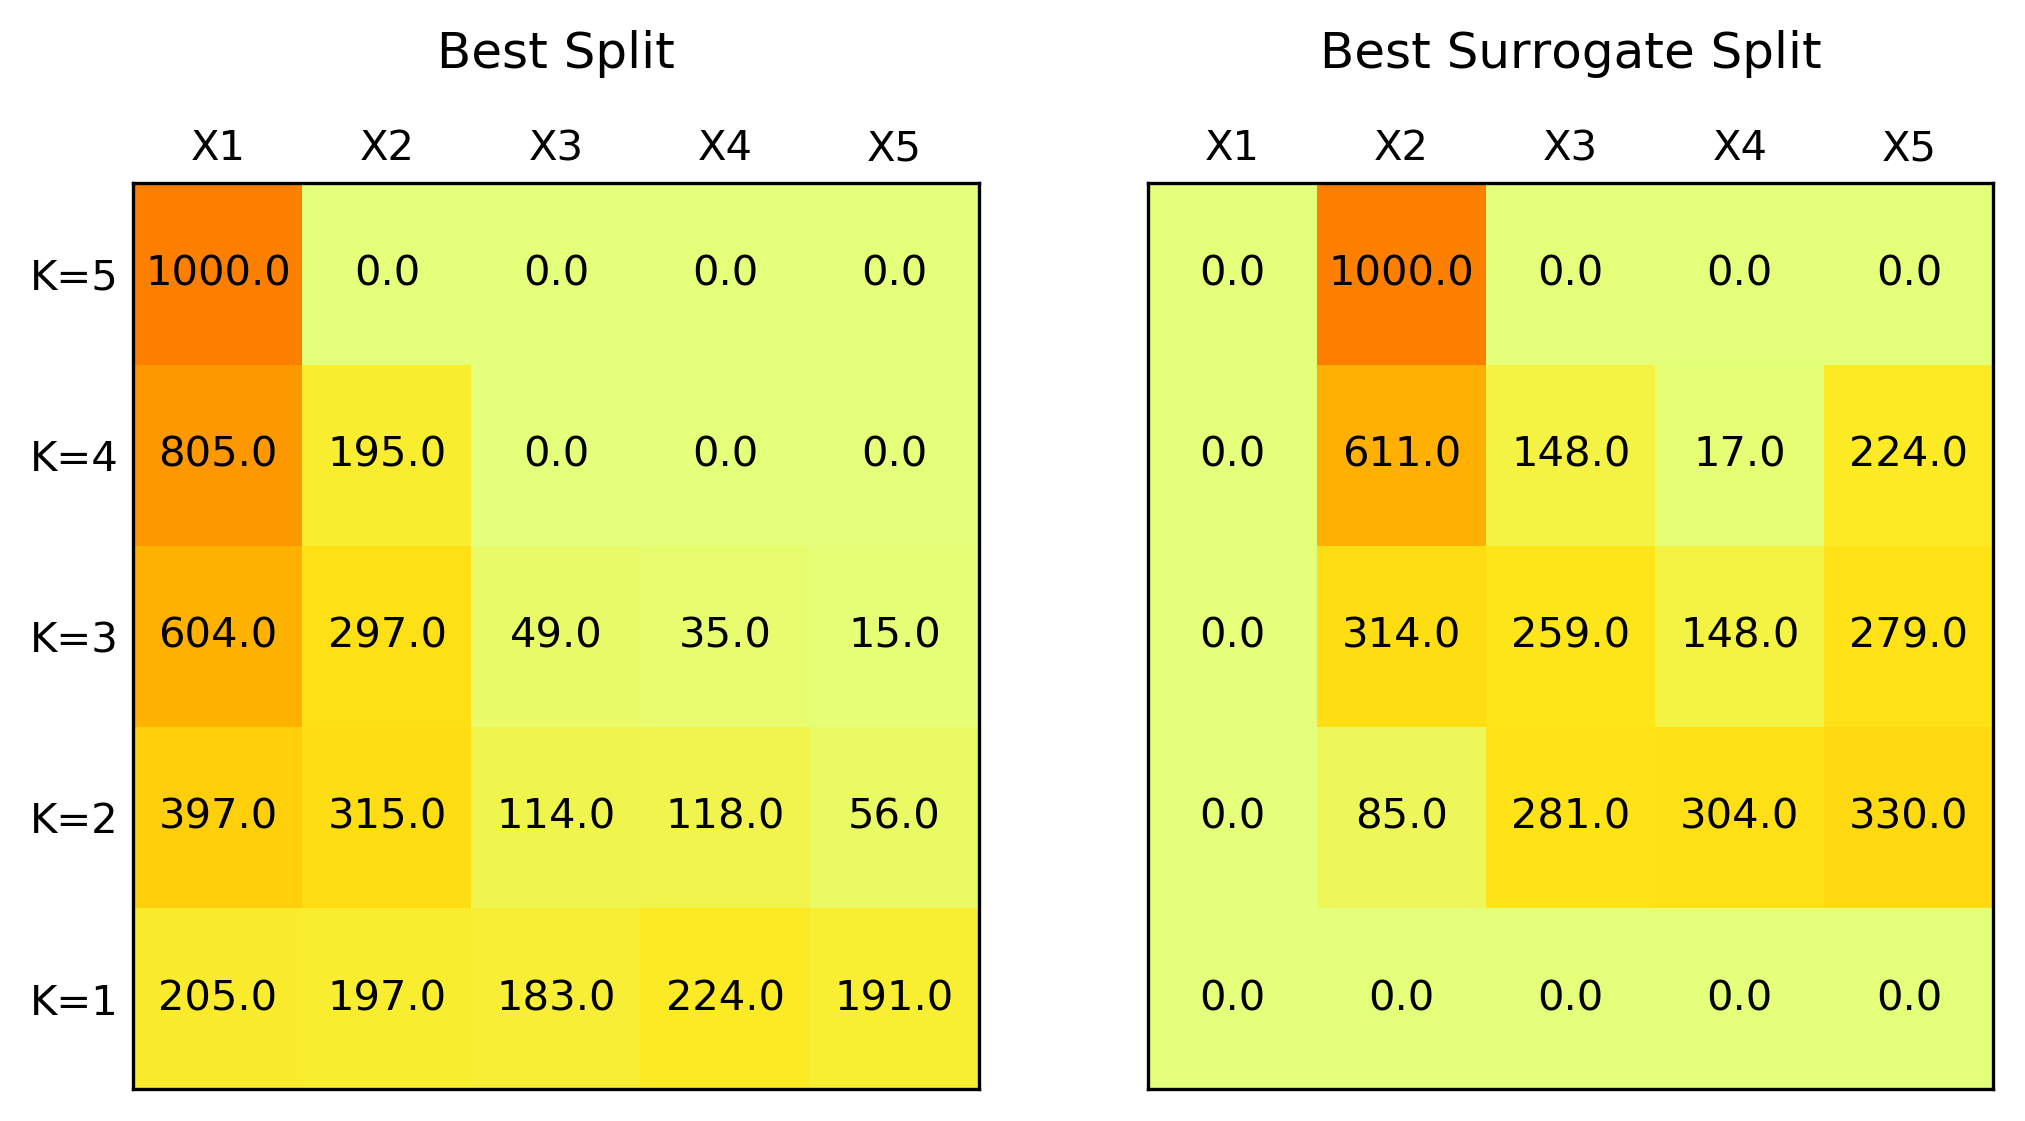

In [482]:
fig = plt.figure(figsize=(8,4), dpi=300)

ax = plt.subplot(1, 2, 1)
plt.pcolor(df_best.values/M, cmap='Wistia')
plt.xticks(np.arange(0,5,1) + 0.5, df_best.columns)
plt.yticks(np.arange(0,5,1) + 0.5, df_best.index)
ax.xaxis.set_ticks_position('top')
ax.axes.tick_params(length=0)
for i in range(5):
    for j in range(5):
        plt.text(i+0.5,j+0.5, df_best.T.iloc[i,j], ha='center', va='center')
plt.title("Best Split",y=1.1)

ax = plt.subplot(1, 2, 2)
plt.pcolor(df_surr.values/M, cmap='Wistia')
plt.xticks(np.arange(0,5,1) + 0.5, df_surr.columns)
plt.yticks(np.arange(0,5,1) + 0.5, 5*[''])
ax.xaxis.set_ticks_position('top')
ax.axes.tick_params(length=0)
for i in range(5):
    for j in range(5):
        plt.text(i+0.5,j+0.5, df_surr.T.iloc[i,j], ha='center', va='center')
plt.title("Best Surrogate Split",y=1.1)
plt.show()

This plot suggests that the best split is on X1, followed by X2, X3, etc. The best surrogate split appears to be X2, followed by X5, X3, and X4.

### (ii). Variable Importance

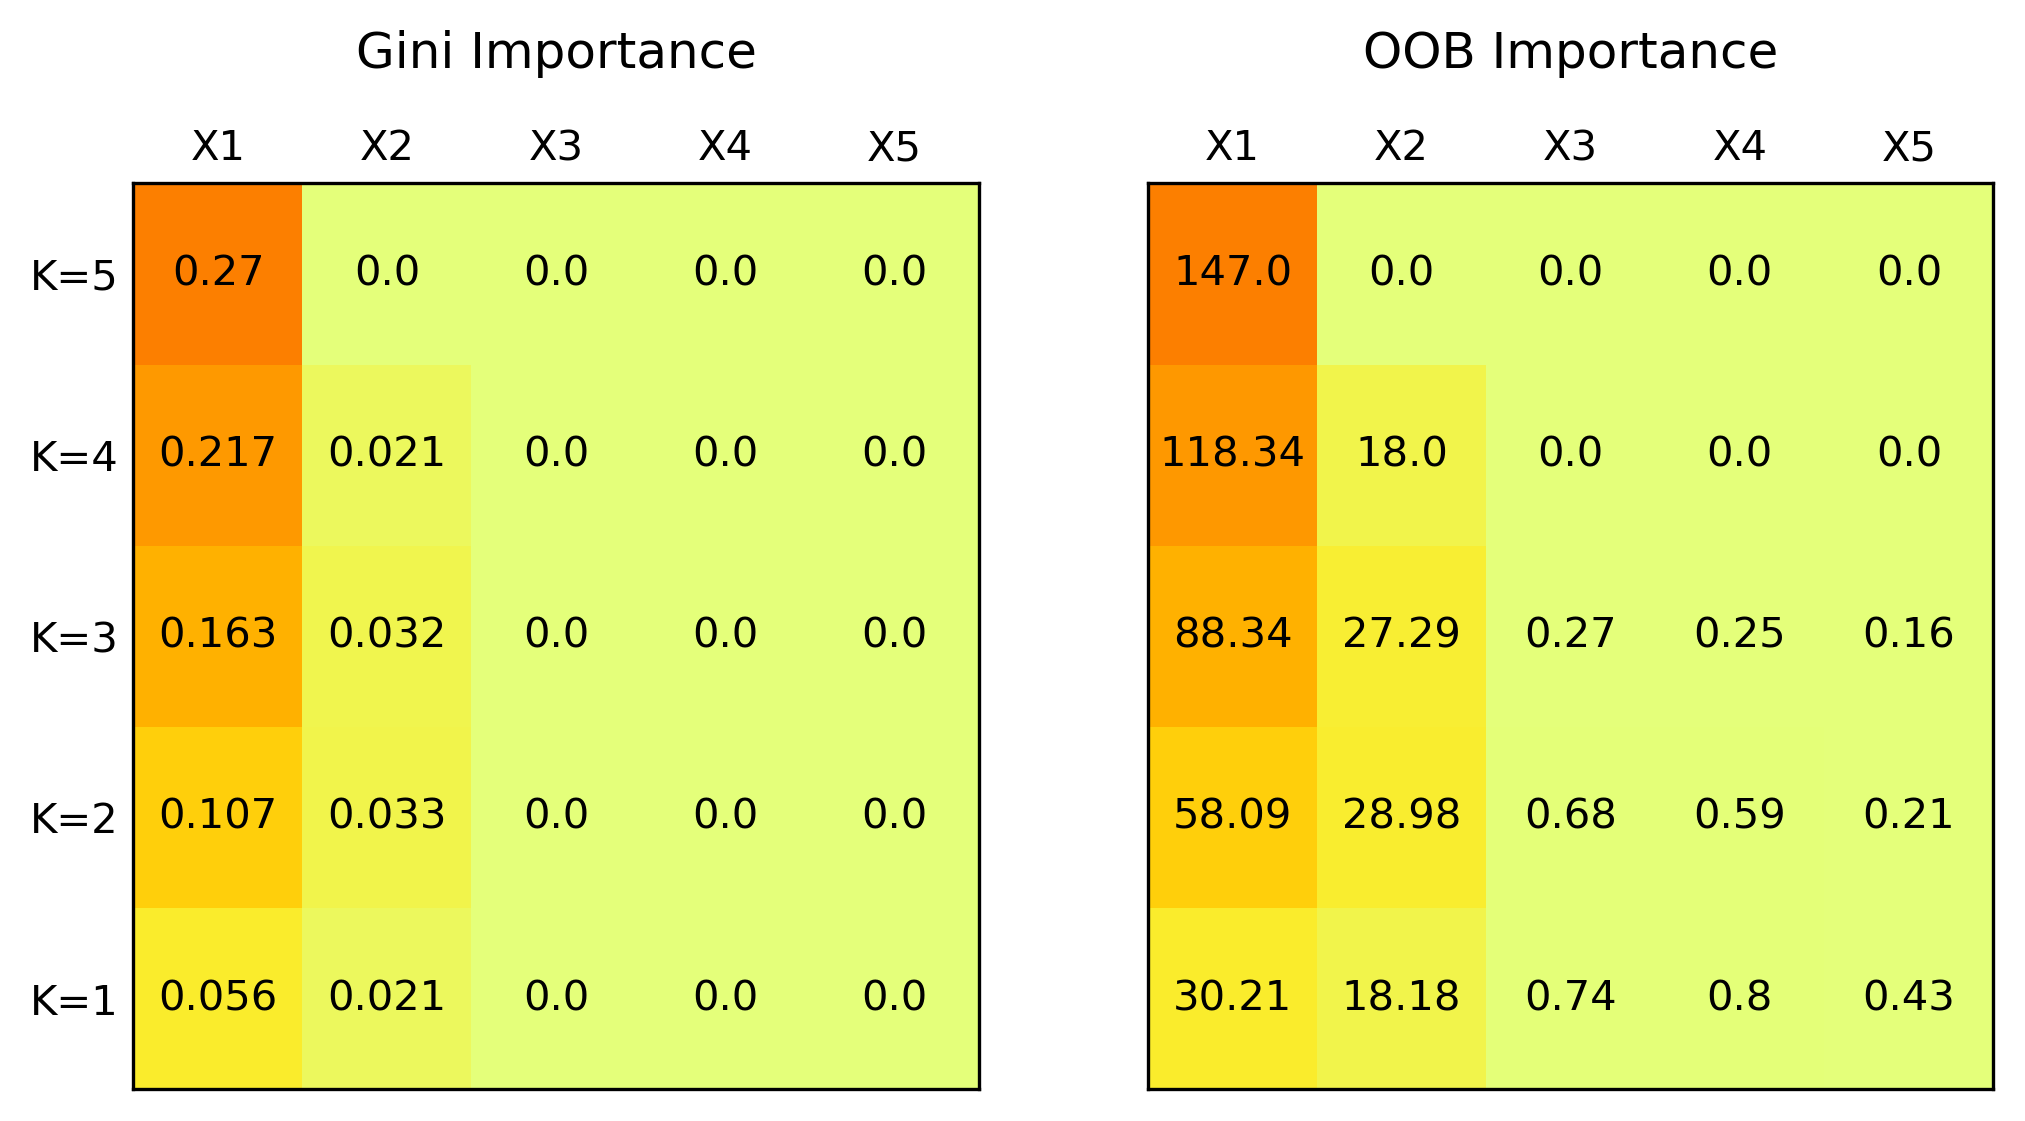

In [483]:
fig = plt.figure(figsize=(8,4), dpi=300)

ax = plt.subplot(1, 2, 1)
plt.pcolor(df_gini.values, cmap='Wistia')
plt.xticks(np.arange(0,5,1) + 0.5, df_gini.columns)
plt.yticks(np.arange(0,5,1) + 0.5, df_gini.index)
ax.xaxis.set_ticks_position('top')
ax.axes.tick_params(length=0)
for i in range(5):
    for j in range(5):
        plt.text(i+0.5,j+0.5, np.round(df_gini.T.iloc[i,j],decimals=3),
                 ha='center', va='center')
plt.title("Gini Importance",y=1.1)

ax = plt.subplot(1, 2, 2)
plt.pcolor(df_oob.values, cmap='Wistia')
plt.xticks(np.arange(0,5,1) + 0.5, df_oob.columns)
plt.yticks(np.arange(0,5,1) + 0.5, 5*[''])
ax.xaxis.set_ticks_position('top')
ax.axes.tick_params(length=0)
for i in range(5):
    for j in range(5):
        plt.text(i+0.5,j+0.5, np.round(df_oob.T.iloc[i,j],decimals=2),
                 ha='center', va='center')
plt.title("OOB Importance",y=1.1)
plt.show()

These results suggest that $X_1$ and $X_2$ are the most important variables for classification. Here, the impact of masking appears to be lessened as compared with Equations (2) and (3). 

### (iii). Loss

In [489]:
Markdown(r"$$ R_{Avg}(f) = %0.1f \\ R_{Vote}(f) = %0.1f $$" %(test_error_avg,test_error_vote))

$$ R_{Avg}(f) = 10.0 \\ R_{Vote}(f) = 47.0 $$

The average loss from the predictions of individual trees is considerably less than the loss from voting amongst trees. The voting method is the correct implementation of the CART random forests. This suggests that by averaging loss from individual trees, one might artificially infer greater classification accuracy than actually possible.

## Part 2(c). Random Forest Bootstrapping

In [473]:
M = 1000

means_gini = []
means_oob = []
stds_gini = []
stds_oob = []

for q in [0.4, 0.5, 0.6, 0.7, 0.8]:
    results = random_forest(X, y, K=2, B=int(q*n), M=M)
    
    means_gini.append( results['gini_means'].rename("q="+str(q),inplace=True))
    means_oob.append( results['oob_means'].rename("q="+str(q),inplace=True))
    stds_gini.append( results['gini_stds'].rename("q="+str(q),inplace=True))
    stds_oob.append( results['oob_stds'].rename("q="+str(q),inplace=True))
    
df_gini = pd.concat(means_gini,axis=1).T
df_oob = pd.concat(means_oob,axis=1).T
df_gini_std = pd.concat(stds_gini,axis=1).T.fillna(0.0)
df_oob_std = pd.concat(stds_oob,axis=1).T.fillna(0.0)

### (i). Variable Importance

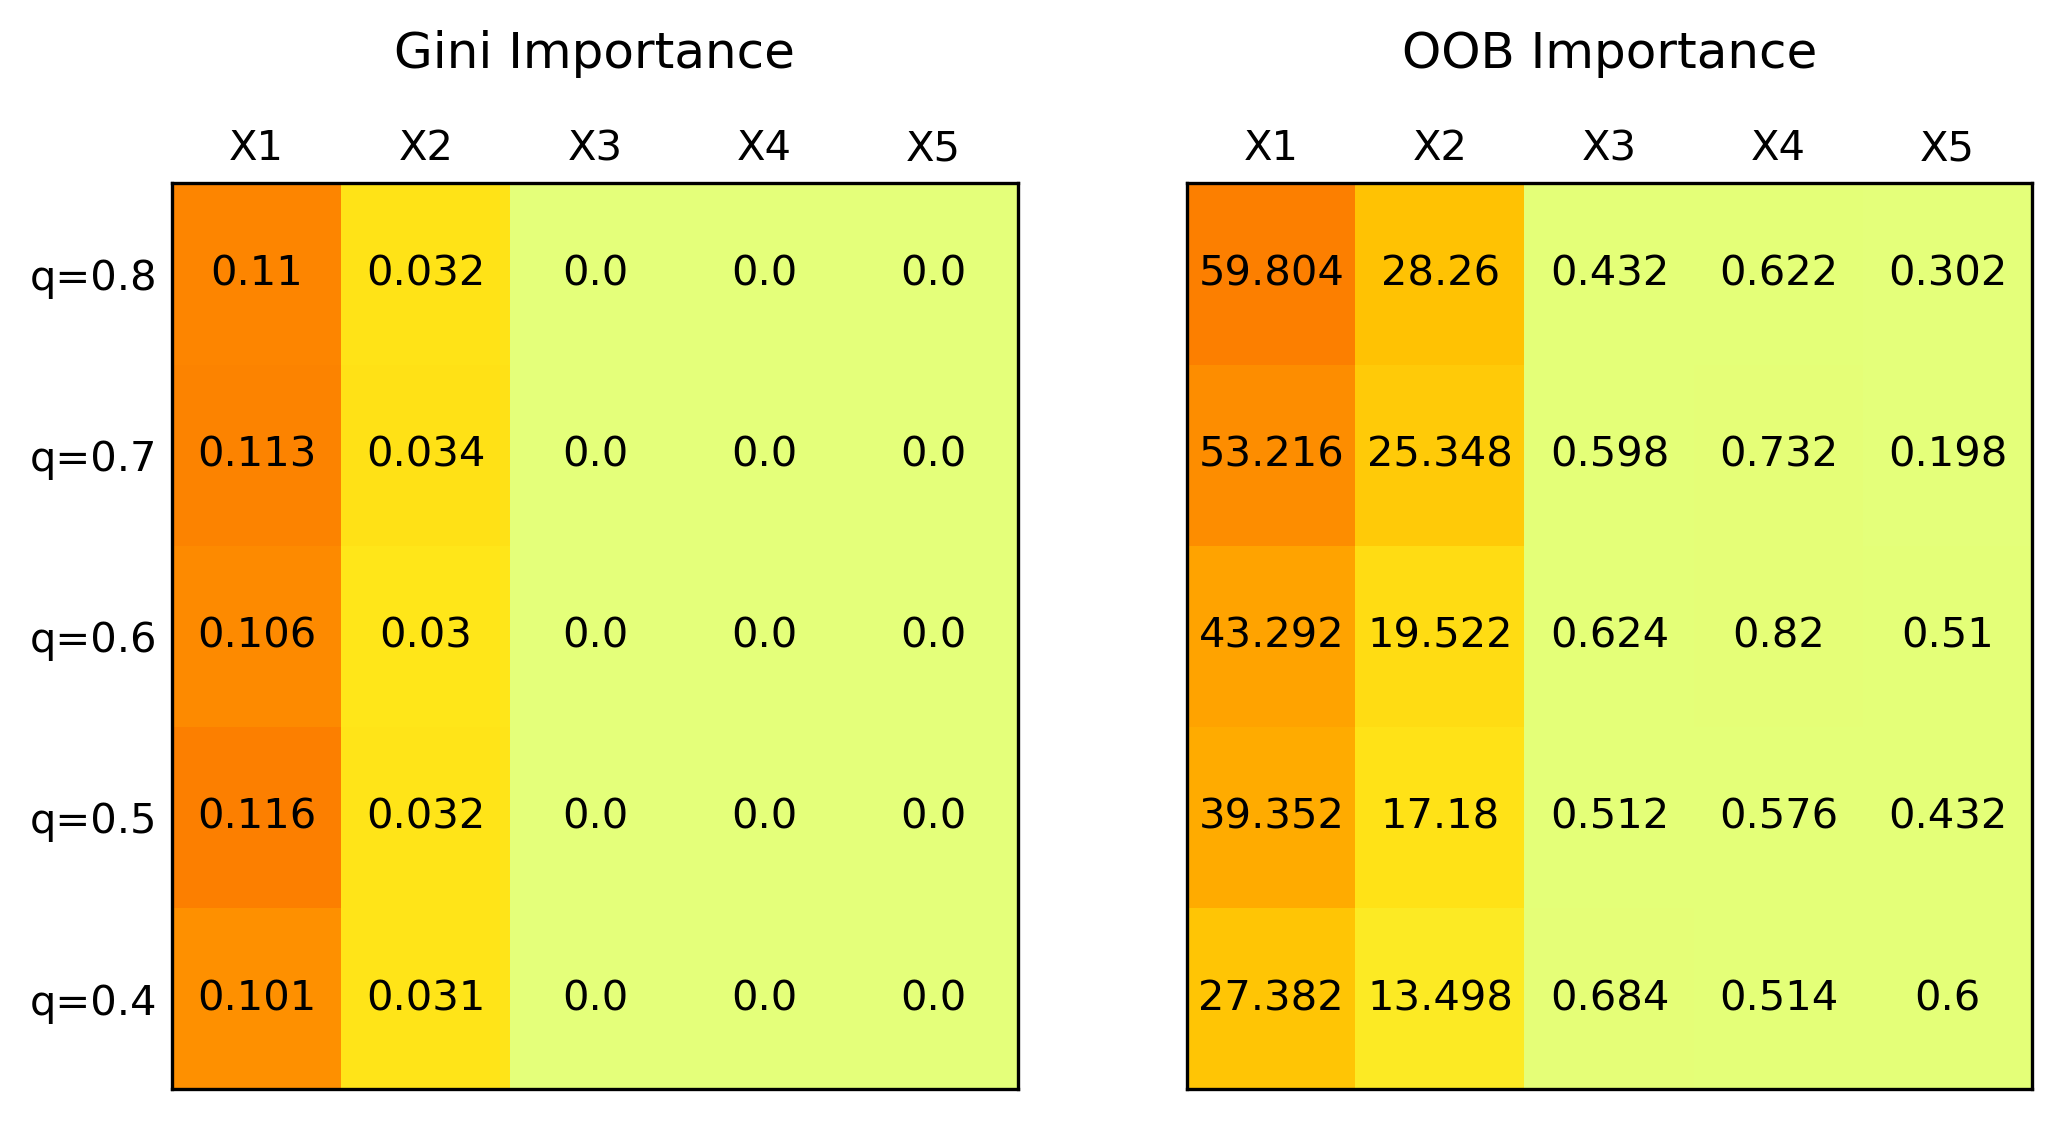

In [474]:
fig = plt.figure(figsize=(8,4), dpi=300)

ax = plt.subplot(1, 2, 1)
plt.pcolor(df_gini.values, cmap='Wistia')
plt.xticks(np.arange(0,5,1) + 0.5, df_gini.columns)
plt.yticks(np.arange(0,5,1) + 0.5, df_gini.index)
ax.xaxis.set_ticks_position('top')
ax.axes.tick_params(length=0)
for i in range(5):
    for j in range(5):
        plt.text(i+0.5,j+0.5, np.round(df_gini.T.iloc[i,j],decimals=3),
                 ha='center', va='center')
plt.title("Gini Importance",y=1.1)

ax = plt.subplot(1, 2, 2)
plt.pcolor(df_oob.values, cmap='Wistia')
plt.xticks(np.arange(0,5,1) + 0.5, df_oob.columns)
plt.yticks(np.arange(0,5,1) + 0.5, 5*[''])
ax.xaxis.set_ticks_position('top')
ax.axes.tick_params(length=0)
for i in range(5):
    for j in range(5):
        plt.text(i+0.5,j+0.5, np.round(df_oob.T.iloc[i,j],decimals=2),
                 ha='center', va='center')
plt.title("OOB Importance",y=1.1)
plt.show()

This result confirms that features $X_1$ and $X_2$ are the strongest classifiers. Notably, the feature importances does not appear to be effected by the size of the bootstrap samples. However, OOB appears to produce larger feature importances for larget values of q.

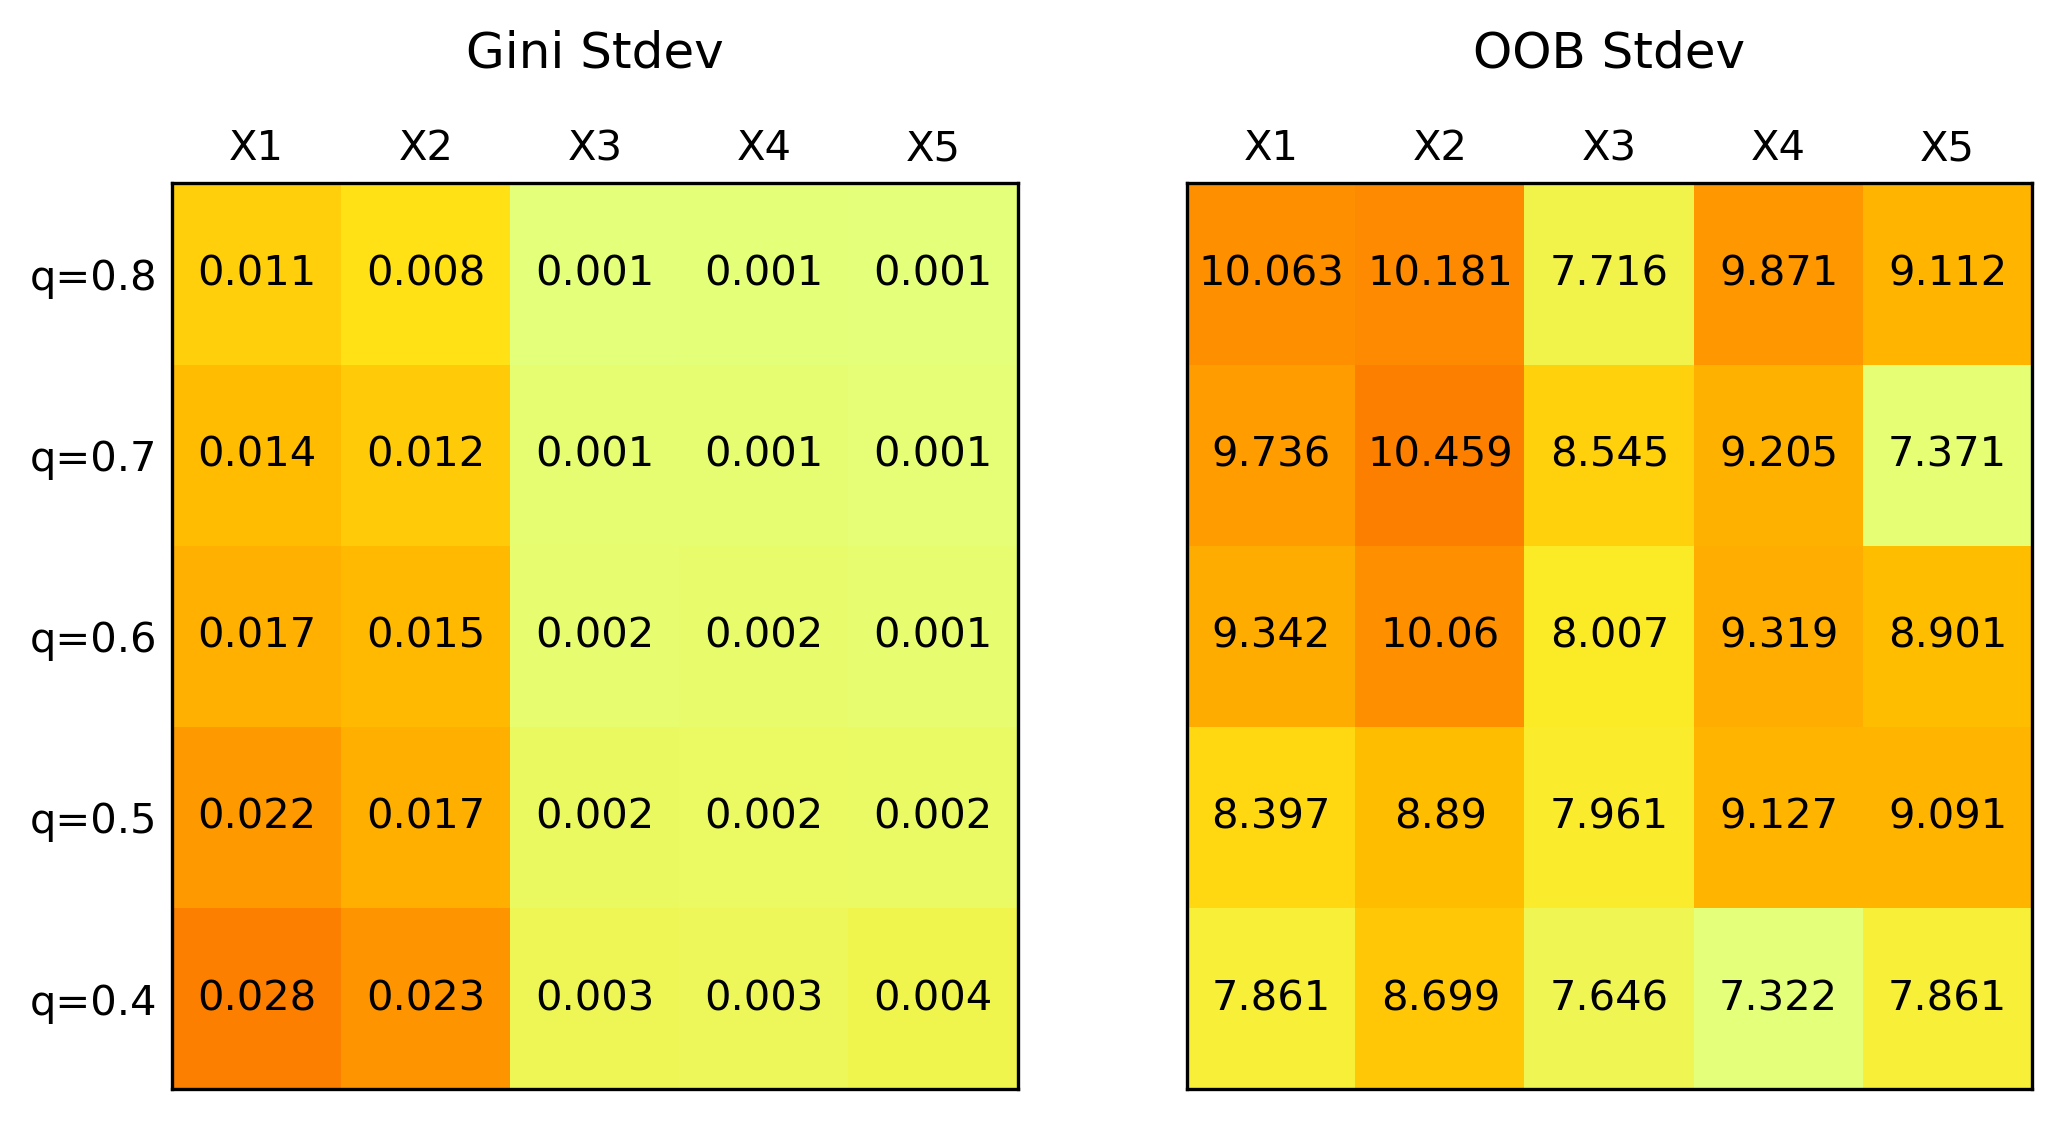

In [475]:
fig = plt.figure(figsize=(8,4), dpi=300)

ax = plt.subplot(1, 2, 1)
plt.pcolor(df_gini_std.values, cmap='Wistia')
plt.xticks(np.arange(0,5,1) + 0.5, df_gini_std.columns)
plt.yticks(np.arange(0,5,1) + 0.5, df_gini_std.index)
ax.xaxis.set_ticks_position('top')
ax.axes.tick_params(length=0)
for i in range(5):
    for j in range(5):
        plt.text(i+0.5,j+0.5, np.round(df_gini_std.T.iloc[i,j],decimals=3),
                 ha='center', va='center')
plt.title("Gini Stdev",y=1.1)

ax = plt.subplot(1, 2, 2)
plt.pcolor(df_oob_std.values, cmap='Wistia')
plt.xticks(np.arange(0,5,1) + 0.5, df_oob_std.columns)
plt.yticks(np.arange(0,5,1) + 0.5, 5*[''])
ax.xaxis.set_ticks_position('top')
ax.axes.tick_params(length=0)
for i in range(5):
    for j in range(5):
        plt.text(i+0.5,j+0.5, np.round(df_oob_std.T.iloc[i,j],decimals=3),
                 ha='center', va='center')
plt.title("OOB Stdev",y=1.1)
plt.show()

This result suggests that OOB estimates are generally noisier than Gini estimates of feature importance. Smaller values of $q$ appear to increase the noisiness of Gini estimates, whereas they decrease the noisiness of OOB feature importances.